In [1]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Connect to DuckDB DB file
con = duckdb.connect("/Users/koosha/00-My Files-00/My Works/GitHub/Repositories/BNPL_Customer_Data/BNPL_customer_data/dev.duckdb", read_only=True)

# Read from staging model
query = "SELECT * FROM stg_BNPL_customer"
df = con.execute(query).fetchdf()

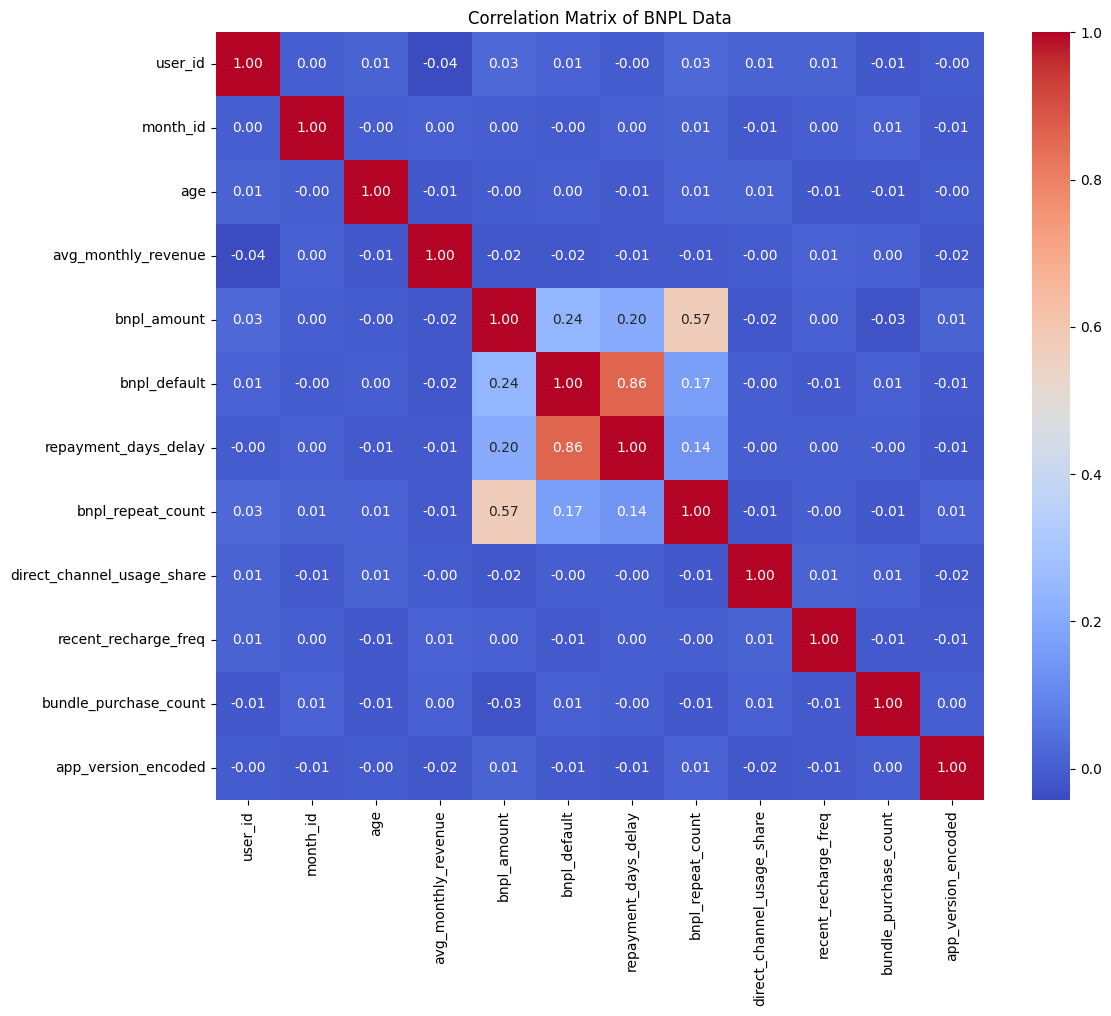

In [3]:
# Preprocessing: drop categorical column or encode it
if 'app_version' in df.columns:
    df['app_version'] = df['app_version'].astype(str)
    df['app_version_encoded'] = df['app_version'].astype('category').cat.codes
    df.drop(columns=['app_version'], inplace=True)

# Compute correlation matrix
correlation = df.corr(numeric_only=True)

# Save correlation matrix as CSV (optional)
correlation.to_csv("../results/correlation_matrix.csv")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of BNPL Data")
plt.tight_layout()
plt.savefig("../results/correlation_matrix_plot.png")
plt.show()


: 